`Support Vector Regression (SVR)` is a machine learning algorithm used for regression tasks. Its mathematical intuition builds upon the concepts of Support Vector Machines (SVM) and extends them to handle continuous target variables. Here's a mathematical intuition of Support Vector Regressor:

Training Data:

SVR is trained on a dataset consisting of input vectors (xᵢ) and their corresponding continuous target values (yᵢ).
The goal is to find a function f(x) that predicts the target value y given an input vector x.
Regression Function:

In SVR, the regression function is defined as f(x) = w·x + b, similar to SVM.
Here, w is the weight vector, x is the input vector, and b is the bias term.
Margin:

SVR aims to find a regression function that approximates the target values while maximizing the margin around the regression line.
The margin represents a region around the regression line within which errors are tolerated.
Loss Function:

SVR utilizes a loss function to measure the error between the predicted value f(x) and the actual target value y.
The loss function is typically defined as the difference between the predicted and actual values, with some penalty for points outside the margin.
One common choice for the loss function in SVR is the epsilon-insensitive loss function.
Epsilon-Insensitive Loss Function:

The epsilon-insensitive loss function allows for a tolerance level (epsilon) within which errors are considered negligible.
If the difference between the predicted and actual values (|f(x) - y|) is less than epsilon, the loss is zero.
If the difference exceeds epsilon, the loss is proportional to the difference, accounting for errors outside the tolerance.
Support Vectors:

Support vectors are the data points that lie either on the margin or within the margin's proximity.
These support vectors have the most significant influence on determining the regression function.
Optimization Problem:

The optimization problem for SVR aims to minimize the loss function while simultaneously maximizing the margin and ensuring the errors are within the tolerance level (epsilon).
The objective is to find the optimal weight vector w and bias term b that minimize the loss function while satisfying the constraints.
Regularization Parameter:

SVR includes a regularization parameter (C) that controls the trade-off between minimizing the loss function and maximizing the margin.
A higher value of C results in a smaller margin but potentially lower training errors, while a lower value of C prioritizes a larger margin but might tolerate more errors.
By optimizing the loss function while considering the margin and support vectors, SVR finds a regression function that generalizes well to new data. It allows for some errors within the margin while aiming to approximate the target values as accurately as possible.


In Support Vector Machines (SVM), the concept of marginal error refers to the classification or regression errors made by the SVM model on the support vectors—the data points that lie on or within the margin. Marginal errors are important because they have the most influence on determining the optimal decision boundary or regression function. Here's an explanation of marginal errors in SVM:

Margin:

In SVM, the margin refers to the region between the decision boundary (hyperplane) and the support vectors.
The goal of SVM is to maximize the margin, as it is expected to provide better generalization and robustness to new data.
Support Vectors:

Support vectors are the data points that lie either on the margin or within its proximity.
These points have the most influence on determining the optimal decision boundary or regression function.
Classification Marginal Error:

For classification tasks, the marginal error refers to the misclassification of support vectors—those points that are within the margin but are misclassified.
These support vectors are the critical points that contribute to defining the margin and decision boundary.
Regression Marginal Error:

In regression tasks, the marginal error refers to the difference between the predicted value and the actual value for the support vectors.
The regression function is expected to minimize these marginal errors for the support vectors, as they have the most impact on defining the regression line or surface.
Impact on Optimization:

The optimization process in SVM aims to find the optimal decision boundary or regression function by minimizing the errors while maximizing the margin.
The model's parameters, such as the weight vector and bias term, are adjusted to reduce the marginal errors and satisfy the constraints of the problem.
By considering the marginal errors of the support vectors, SVM aims to strike a balance between fitting the training data and achieving good generalization to unseen data. The model's optimization process aims to find the best compromise between minimizing the errors and maximizing the margin, ultimately leading to a robust and effective decision boundary or regression function.

## Support vector regressor Implementation

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
from sklearn.datasets import make_regression

In [9]:
X,y = make_regression(n_samples=1000, n_features=2,
                          n_targets=1, noise=3.0)

<Axes: xlabel='0', ylabel='1'>

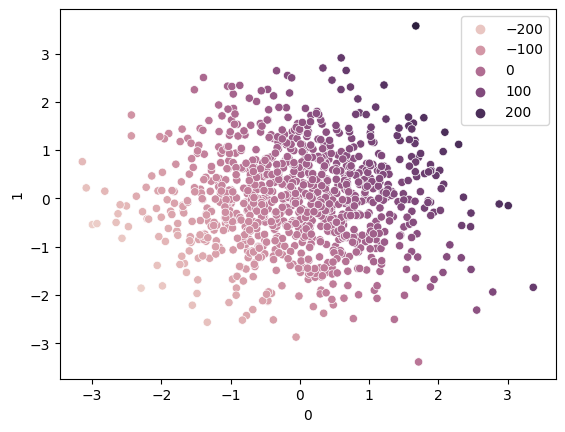

In [10]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                        test_size=0.25,random_state=10)

In [15]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')

In [16]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [18]:
svr.coef_

array([[65.12813363, 39.80650087]])

In [12]:
from sklearn.metrics import r2_score

In [20]:
## prediction
y_pred = svr.predict(X_test)
print(r2_score(y_test,y_pred))

0.9983842609920406


## Hyperparameter Training in Supportr Vector

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = {
    "C":[0.1, 1, 10, 100, 1000],
    "gamma":[1,0.1,0.01,0.0001,0.0001],
    "kernel":['linear'],
    "epsilon":[0.1,0.2,0.3]
}

In [25]:
grid = GridSearchCV(SVR(), param_grid=param_grid, scoring= 'neg_mean_squared_error',refit=True, cv=5
                ,verbose=3)

In [26]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-820.420 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-665.004 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-1034.699 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-924.908 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=-938.212 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-820.420 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-665.004 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-1034.699 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-924.908 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=-938.212 total time=   0.0s
[CV 1/

[CV 1/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=-9.719 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=-8.791 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=-8.607 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=-9.307 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=-10.901 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=-9.719 total time=   0.0s
[CV 2/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=-8.791 total time=   0.0s
[CV 3/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=-8.607 total time=   0.0s
[CV 4/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=-9.307 total time=   0.0s
[CV 5/5] END C=1, epsilon=0.1, gamma=0.0001, kernel=linear;, score=-10.901 total time=   0.0s
[CV 1/5] END C=1, epsilon=0.2, gamma=1, kernel=linear;, score=-9.699

[CV 1/5] END C=10, epsilon=0.2, gamma=0.1, kernel=linear;, score=-9.344 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.2, gamma=0.1, kernel=linear;, score=-9.082 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.2, gamma=0.1, kernel=linear;, score=-8.245 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.2, gamma=0.1, kernel=linear;, score=-9.113 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.2, gamma=0.1, kernel=linear;, score=-10.862 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=-9.344 total time=   0.0s
[CV 2/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=-9.082 total time=   0.0s
[CV 3/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=-8.245 total time=   0.0s
[CV 4/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=-9.113 total time=   0.0s
[CV 5/5] END C=10, epsilon=0.2, gamma=0.01, kernel=linear;, score=-10.862 total time=   0.0s
[CV 1/5] END C=10, epsilon=0.2, gamma=0.0001, kernel=linear;, score=-9.344 total ti

[CV 1/5] END C=100, epsilon=0.2, gamma=0.0001, kernel=linear;, score=-9.330 total time=   0.1s
[CV 2/5] END C=100, epsilon=0.2, gamma=0.0001, kernel=linear;, score=-9.116 total time=   0.1s
[CV 3/5] END C=100, epsilon=0.2, gamma=0.0001, kernel=linear;, score=-8.245 total time=   0.1s
[CV 4/5] END C=100, epsilon=0.2, gamma=0.0001, kernel=linear;, score=-9.124 total time=   0.1s
[CV 5/5] END C=100, epsilon=0.2, gamma=0.0001, kernel=linear;, score=-10.905 total time=   0.1s
[CV 1/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=-9.359 total time=   0.1s
[CV 2/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=-9.126 total time=   0.1s
[CV 3/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=-8.255 total time=   0.1s
[CV 4/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=-9.119 total time=   0.1s
[CV 5/5] END C=100, epsilon=0.3, gamma=1, kernel=linear;, score=-10.903 total time=   0.1s
[CV 1/5] END C=100, epsilon=0.3, gamma=0.1, kernel=linear;, score=-9.359 

[CV 4/5] END C=1000, epsilon=0.3, gamma=0.1, kernel=linear;, score=-9.119 total time=   2.5s
[CV 5/5] END C=1000, epsilon=0.3, gamma=0.1, kernel=linear;, score=-10.905 total time=   2.0s
[CV 1/5] END C=1000, epsilon=0.3, gamma=0.01, kernel=linear;, score=-9.360 total time=   1.1s
[CV 2/5] END C=1000, epsilon=0.3, gamma=0.01, kernel=linear;, score=-9.131 total time=   1.3s
[CV 3/5] END C=1000, epsilon=0.3, gamma=0.01, kernel=linear;, score=-8.252 total time=   1.1s
[CV 4/5] END C=1000, epsilon=0.3, gamma=0.01, kernel=linear;, score=-9.119 total time=   0.9s
[CV 5/5] END C=1000, epsilon=0.3, gamma=0.01, kernel=linear;, score=-10.905 total time=   1.3s
[CV 1/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=-9.360 total time=   1.0s
[CV 2/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=-9.131 total time=   0.9s
[CV 3/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel=linear;, score=-8.252 total time=   0.9s
[CV 4/5] END C=1000, epsilon=0.3, gamma=0.0001, kernel

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.0001, 0.0001],
                         'kernel': ['linear']},
             scoring='neg_mean_squared_error', verbose=3)

In [ ]:
grid.best_params_

In [ ]:
## pridiction
y_pred = grid.predict(X_test)
print(r2_score(y_test, y_pred))
